In [1]:
import matplotlib.pyplot as plt 
import os 
import json
import tensorflow as tf
import numpy as np
import pandas as pd

In [8]:
non_revenue_df = pd.read_csv("revenue_zero.csv", dtype={'fullVisitorId': 'str'}, encoding='latin-1')

In [9]:
non_revenue_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,...,traffic_campaign,traffic_source,traffic_medium,traffic_keyword,traffic_referralPath,traffic_adContent,traffic_adwordsClickInfo.page,traffic_adwordsClickInfo.slot,traffic_adwordsClickInfo.gclId,traffic_adwordsClickInfo.adNetworkType
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,Linux,False,...,(not set),google,organic,google + online,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,Android,True,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for column in non_revenue_df.keys():
    print(non_revenue_df.groupby(column).size())
    
    print("\n")
    print("\n")

channelGrouping
(Other)              119
Affiliates         16394
Direct            140984
Display             6120
Organic Search    378123
Paid Search        24858
Referral           99527
Social            226013
dtype: int64




date
20160801    1677
20160802    2123
20160803    2890
20160804    3144
20160805    2661
20160806    1653
20160807    1606
20160808    2781
20160809    2809
20160810    2711
20160811    2622
20160812    2548
20160813    1582
20160814    1778
20160815    2978
20160816    2814
20160817    2759
20160818    2682
20160819    2329
20160820    1643
20160821    1707
20160822    2527
20160823    2697
20160824    2580
20160825    2477
20160826    2320
20160827    1639
20160828    1660
20160829    2411
20160830    2641
            ... 
20170703    2033
20170704    1931
20170705    2844
20170706    2628
20170707    2412
20170708    1845
20170709    1902
20170710    2725
20170711    2595
20170712    2506
20170713    2679
20170714    2338
20170715    1705
20170716    17

geo_continent
(not set)      1462
Africa        14737
Americas     439094
Asia         223573
Europe       198232
Oceania       15040
dtype: int64




geo_subContinent
(not set)               1462
Australasia            14879
Caribbean               2390
Central America        15557
Central Asia            1213
Eastern Africa          1924
Eastern Asia           46860
Eastern Europe         45235
Melanesia                 81
Micronesian Region        55
Middle Africa            393
Northern Africa         7682
Northern America      379514
Northern Europe        58141
Polynesia                 25
South America          41633
Southeast Asia         77768
Southern Africa         2167
Southern Asia          59310
Southern Europe        35772
Western Africa          2571
Western Asia           38422
Western Europe         59084
dtype: int64




geo_country
(not set)                   1462
Afghanistan                   57
Albania                      547
Algeria                     2055
Amer

totals_transactionRevenue
0    892138
dtype: int64




traffic_campaign
(not set)                                          854297
AW - Accessories                                     6940
AW - Apparel                                           45
AW - Dynamic Search Ads Whole Site                  13921
AW - Electronics                                       96
All Products                                            4
Data Share                                              1
Data Share Promo                                    16394
Retail (DO NOT EDIT owners nophakun and tianyu)        49
test-liyuhz                                           391
dtype: int64




traffic_source
(direct)                                                        140986
(not set)                                                           69
0.muppet1.frontend.gws.muppet-exp.ij-q.borg.google.com:14634         1
0.shared.bow.cat2.ads-bow.lf.borg.google.com:9817                    1
0.shared.bow.cat2.ads-bow.lf.bor

In [11]:
dates = []
corresponding_count = []

In [12]:
for specific_date, count in revenue_df.groupby("date").size().iteritems():
    dates.append(specific_date)
    corresponding_count.append(count)

In [13]:
len(dates), len(corresponding_count)

(366, 366)

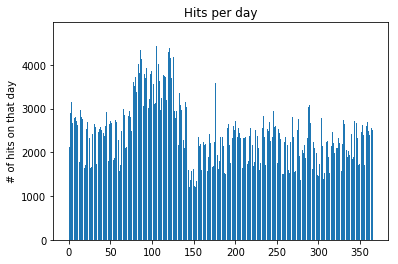

In [14]:
xs = [i + 0.1 for i, _ in enumerate(dates)]
plt.bar(xs, corresponding_count)
plt.ylabel("# of hits on that day")
plt.title("Hits per day")
# plt.xticks([i + 0.5 for i, _ in enumerate(dates)], dates)
plt.show()